<a href="https://colab.research.google.com/github/gregory-lebl/colab-cesi-data-science/blob/regression-simple/Regression_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importer les Librariries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

# Réglage des polices d'affichage

In [ ]:
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Evaluation d'un modèle de régression linéaire simple

Nous allons d'abord définir les fonctions permettant de calculer les paramètres

In [ ]:
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

def fit_least_squares(x, y):
    theta_0 = intercept(x, y)
    theta_1 = slope(x, y)
    return theta_0, theta_1

def predict(x, theta_0, theta_1):
    return theta_0 + theta_1*x

def compute_mse(y, yhat):
    return np.mean((y - yhat)**2)

In [ ]:
plt.style.use('default') # Revert style to default mpl
NO_VIZ, RESID, RESID_SCATTER = range(3)
def least_squares_evaluation(x, y, visualize=NO_VIZ):
    # statistics
    print(f"x_mean : {np.mean(x):.2f}, y_mean : {np.mean(y):.2f}")
    print(f"x_stdev: {np.std(x):.2f}, y_stdev: {np.std(y):.2f}")
    print(f"r = Correlation(x, y): {correlation(x, y):.3f}")

    # Performance metrics
    ahat, bhat = fit_least_squares(x, y)
    yhat = predict(x, ahat, bhat)
    print(f"\theta_0: {ahat:.2f}, \theta_1: {bhat:.2f}")
    print(f"RMSE: {np.sqrt(compute_mse(y, yhat)):.3f}")

    # visualization
    fig, ax_resid = None, None
    if visualize == RESID_SCATTER:
        fig, axs = plt.subplots(1,2,figsize=(8, 3))
        axs[0].scatter(x, y)
        axs[0].plot(x, yhat)
        axs[0].set_title("LS fit")
        ax_resid = axs[1]
    elif visualize == RESID:
        fig = plt.figure(figsize=(4, 3))
        ax_resid = plt.gca()

    if ax_resid is not None:
        ax_resid.scatter(x, y - yhat, color = 'red')
        ax_resid.plot([4, 14], [0, 0], color = 'black')
        ax_resid.set_title("Residuals")

    return fig

On va expérimenter avec des jeux de données fictifs

In [ ]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

anscombe = {
    'I': pd.DataFrame(list(zip(x, y1)), columns =['x', 'y']),
    'II': pd.DataFrame(list(zip(x, y2)), columns =['x', 'y']),
    'III': pd.DataFrame(list(zip(x, y3)), columns =['x', 'y']),
    'IV': pd.DataFrame(list(zip(x4, y4)), columns =['x', 'y'])
}

Nous allons maintenant appliquer la fonction Fit (calcul des paramètres) à nos 4 jeux de données

In [ ]:
for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    x, y = ans["x"], ans["y"]
    ahat, bhat = fit_least_squares(x, y)
    print(f"Dataset {dataset}: theta_0: {ahat:.2f}, theta_1: {bhat:.2f}")

Dataset I: theta_0: 3.00, theta_1: 0.50
Dataset II: theta_0: 3.00, theta_1: 0.50
Dataset III: theta_0: 3.00, theta_1: 0.50
Dataset IV: theta_0: 3.00, theta_1: 0.50


Il semble que les quatre ensembles de données aient exactement le même ajustement.

En fait, les quatre ensembles de données ont les mêmes $\bar{x}$, $\bar{y}$, $\sigma_x$, $\sigma_y$, corrélation $r$, et RMSE ! Si nous nous basons uniquement sur ces statistiques, nous serions probablement enclins à dire que ces ensembles de données sont similaires.


In [ ]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = NO_VIZ)
    print()
    print()

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118




Cependant, ce n'est qu'en visualisant les ensembles de données que nous réalisons que seul l'un de ces quatre ensembles de données a du sens à modéliser en utilisant la régression linéaire simple (SLR).

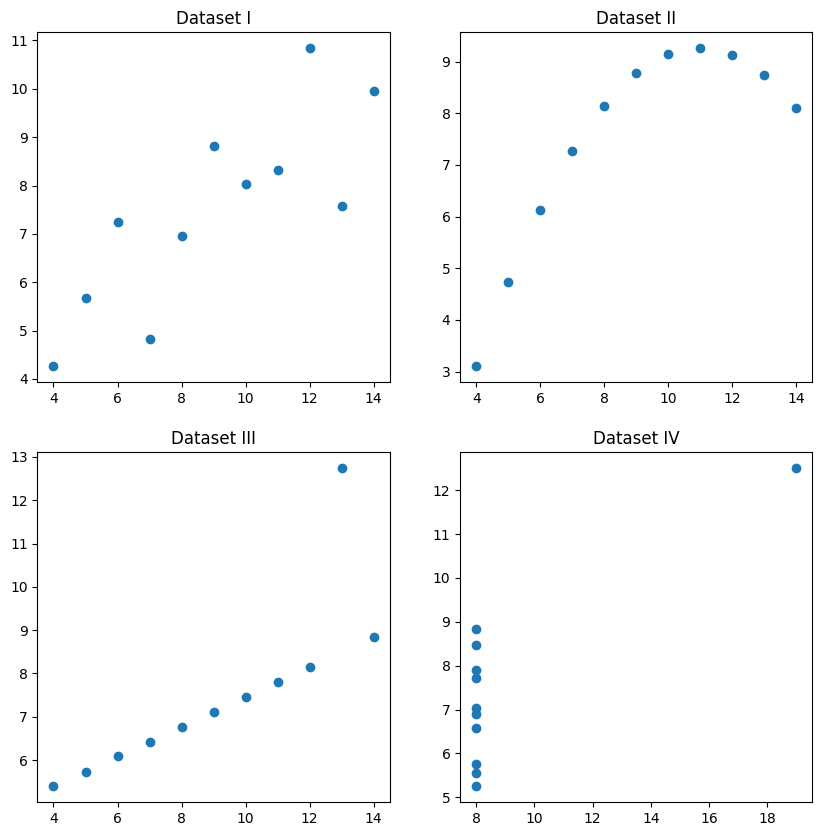

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    axs[i//2, i%2].scatter(ans['x'], ans['y'])
    axs[i//2, i%2].set_title(f"Dataset {dataset}")

plt.show()

Vérifier les résidus mettra également en lumière les différences entre ces quatre ensembles de données.

Rappelez vous : "le graphique des résidus d'une bonne régression ne montre aucun motif".

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


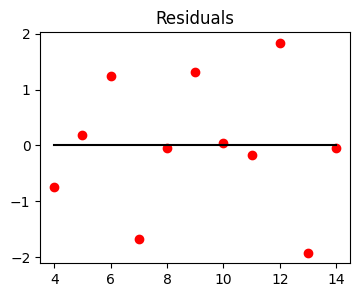



>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


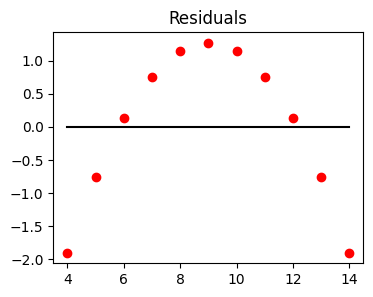



>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


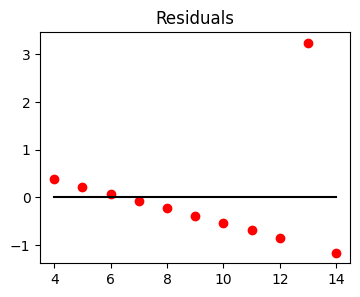



>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


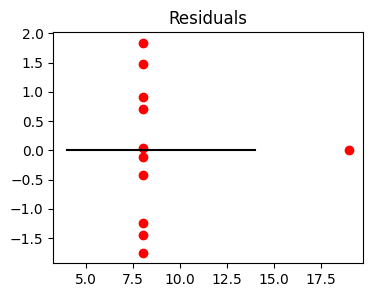

In [ ]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = RESID)
    plt.show(fig)
    print()
    print()

La leçon à retenir ici est que vous devez toujours visualiser vos ensembles de données avant d'ajuster un modèle !

# Comparing Two Different Models, Both Fit with MSE

In [ ]:
dugongs = pd.read_csv("/content/dugong.csv")
data_constant = dugongs["Age"]
data_linear = dugongs[["Length", "Age"]]

Calcule la surface de perte constante. Pour rappel, la perte moyenne du modèle constant est

$
\hat{R}(\theta_0) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \theta_0)^2
$


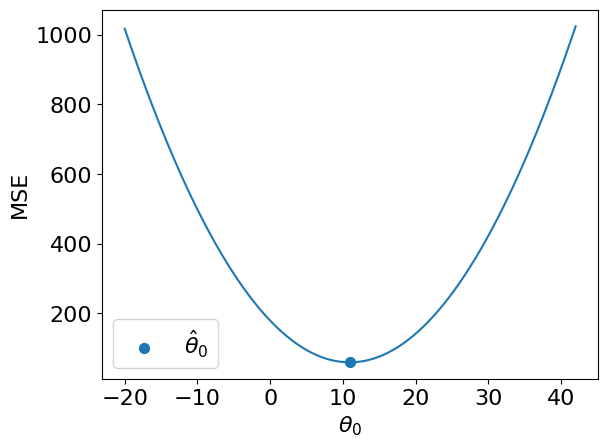

In [ ]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

def mse_constant(theta, data):
    return np.mean(np.array([(y_obs - theta) ** 2 for y_obs in data]), axis=0)

thetas = np.linspace(-20, 42, 1000)
l2_loss_thetas = mse_constant(thetas, data_constant)

plt.plot(thetas, l2_loss_thetas)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'MSE')

# Optimal point
thetahat = np.mean(data_constant)
plt.scatter([thetahat], [mse_constant(thetahat, data_constant)], s=50, label = r"$\hat{\theta}_0$")
plt.legend()
# plt.savefig('mse_constant_loss.png', bbox_inches = 'tight');
plt.show()

Calcule la surface de perte 3D. Pour rappel, la perte moyenne pour le modèle de régression linéaire simple (SLR) est

$
\hat{R}(\theta_0, \theta_1) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (\theta_0 + \theta_1 x_i) \right)^2
$

In [ ]:
import itertools
import plotly.graph_objects as go

def mse_linear(theta_0, theta_1, data_linear):
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    return np.mean(np.array([(y - (theta_0+theta_1*x)) ** 2 for x, y in zip(data_x, data_y)]), axis=0)

theta_0_values = np.linspace(-80, 20, 80)
theta_1_values = np.linspace(-10,30, 80)
mse_values = [mse_linear(theta_0, theta_1, data_linear) \
              for theta_0, theta_1 in itertools.product(theta_0_values, theta_1_values)]
mse_values = np.reshape(mse_values, (len(theta_0_values), len(theta_1_values)), order='F')

# Optimal point
data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
theta_1_hat = np.corrcoef(data_x, data_y)[0, 1] * np.std(data_y) / np.std(data_x)
theta_0_hat = np.mean(data_y) - theta_1_hat * np.mean(data_x)
fig_lin = go.Figure(data=[go.Surface(x=theta_0_values, y=theta_1_values, z=mse_values,name='z=MSE')])
fig_lin.add_trace(go.Scatter3d(x=[theta_0_hat], y=[theta_1_hat], \
                               z=[mse_linear(theta_0_hat, theta_1_hat, data_linear)],\
                               mode='markers', marker=dict(size=12),name='theta hat'))

fig_lin.update_layout(
    autosize=False,
    scene = dict(
                    xaxis_title='theta_0',
                    yaxis_title='theta_1',
                    zaxis_title='z=MSE'),
                    width=500,
                    margin=dict(r=20, b=10, l=10, t=10))

fig_lin.show()

## Calcul de la RMSE

In [ ]:
print("Least Squares Constant Model RMSE:",
          np.sqrt(mse_constant(thetahat, data_constant)))
print("Least Squares Linear Model RMSE:  ",
          np.sqrt(mse_linear(theta_0_hat, theta_1_hat, data_linear)))

Least Squares Constant Model RMSE: 7.722422059764398
Least Squares Linear Model RMSE:   4.311332860288156


Interprétez la RMSE (Root Mean Square Error) :

L'erreur du modèle constant est PLUS ÉLEVÉE que l'erreur du modèle linéaire.

Le modèle linéaire est MEILLEUR que le modèle constant (du moins selon cette métrique).


## Prédictions
Ce code de traçage est laissé à titre de référence. Nous examinerons principalement les figures en cours.


In [ ]:
yobs = data_linear["Age"]
xs = data_linear["Length"]
n = len(yobs)

yhats_constant = [thetahat for i in range(n)]
yhats_linear = [theta_0_hat + theta_1_hat * x for x in xs]

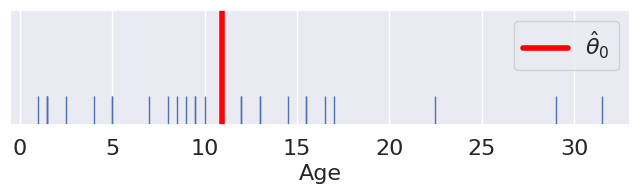

In [ ]:
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.axvline(thetahat, color='red', lw=4, label=r"$\hat{\theta}_0$");
plt.legend()
plt.yticks([])
# plt.savefig('dugong_rug.png', bbox_inches = 'tight');
plt.show()

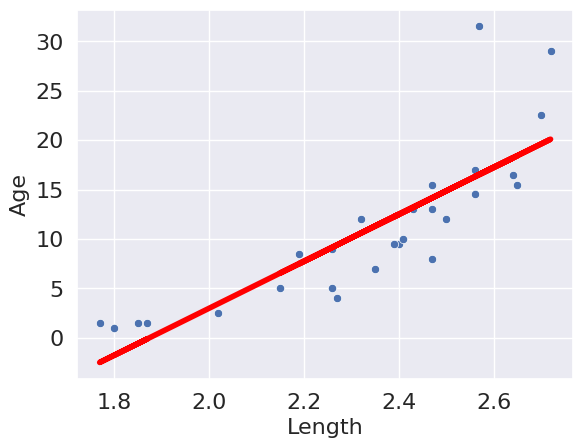

In [ ]:
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.show()